# Data Analysis on Bank Marketing Dataset :

** Bank Marketing Dataset contains both type variables 'Categorical' and 'Numerical'.
    
    Categorical Variable includes :

    * Marital - (Married , Single , Divorced)
    * Job - (Management,Blue Collar)
    * Contact - ()
    * Education - ()
    * Month - ()
    
    


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as m
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit

data = pd.read_csv('/Users/mayurjain/Documents/Fragma ML TEST/August 13/marketing-data.csv',sep=',',header='infer')
def binaryType_(data):
    
    data.is_success.replace(('yes', 'no'), (1, 0), inplace=True)
    data.default.replace(('yes','no'),(1,0),inplace=True)
    data.housing.replace(('yes','no'),(1,0),inplace=True)
    data.loan.replace(('yes','no'),(1,0),inplace=True)
    return data

data = binaryType_(data)

for i in range(len(data.marital.unique())):
    data["marital_"+str(data.marital.unique()[i])] = (data.marital == data.marital.unique()[i]).astype(int)

for j in range(len(data.job.unique())):
    data["job_"+str(data.job.unique()[j])] = (data.job == data.job.unique()[j]).astype(int)

for k in range(len(data.contact.unique())):
    data["contact_"+str(data.contact.unique()[k])] = (data.contact == data.contact.unique()[k]).astype(int)

for l in range(len(data.education.unique())):
    data['education_'+str(data.education.unique()[l])] = (data.education == data.education.unique()[l]).astype(int)

for n in range(len(data.month.unique())):
    data['month_'+str(data.month.unique()[n])] = (data.month == data.month.unique()[n]).astype(int)

    
print(data.describe())
print(data.head())

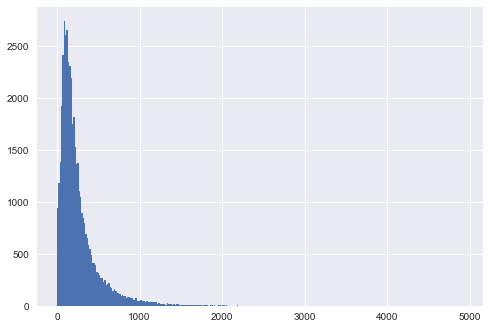

In [390]:
plt.hist(data.duration,bins=300)
plt.show()

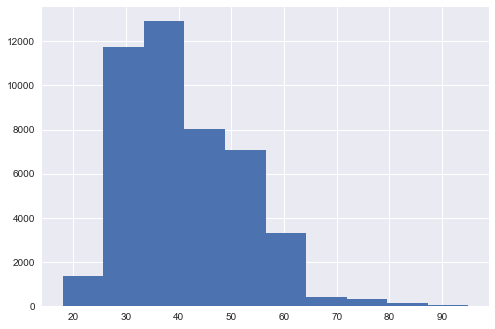

In [391]:
plt.hist(data.age,bins=10)
plt.show()

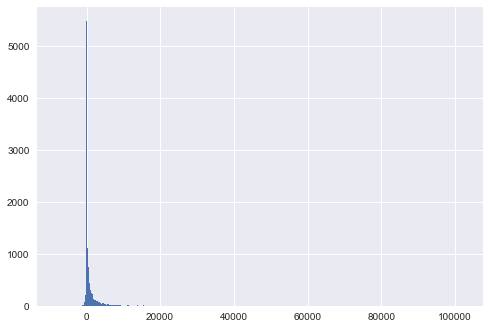

In [392]:
plt.hist(data.balance,bins=3000)
plt.show()

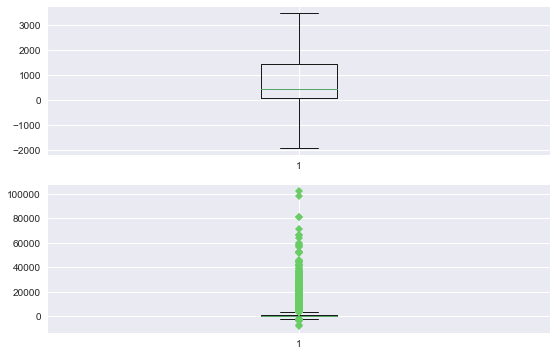

In [393]:
fig = plt.figure(1, figsize=(9, 6))
ax1 = fig.add_subplot(211)
bp1 = ax1.boxplot(data.balance,0,'')
ax2 = fig.add_subplot(212)
bp2 = ax2.boxplot(data.balance,0,'gD')
plt.show()

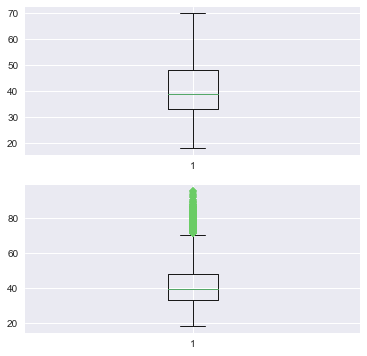

In [394]:
fig = plt.figure(1, figsize=(6, 6))
ax = fig.add_subplot(211)
bp = ax.boxplot(data.age,0,'')
ax = fig.add_subplot(212)
bp = ax.boxplot(data.age,0,'gD')
plt.show()

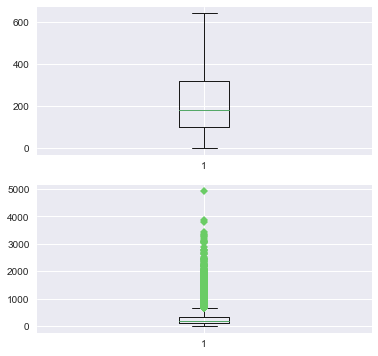

In [395]:
fig = plt.figure(1, figsize=(6, 6))
ax1 = fig.add_subplot(211)
bp1 = ax1.boxplot(data.duration,0,'')
ax2 = fig.add_subplot(212)
bp2 = ax2.boxplot(data.duration,0,'gD')
plt.show()

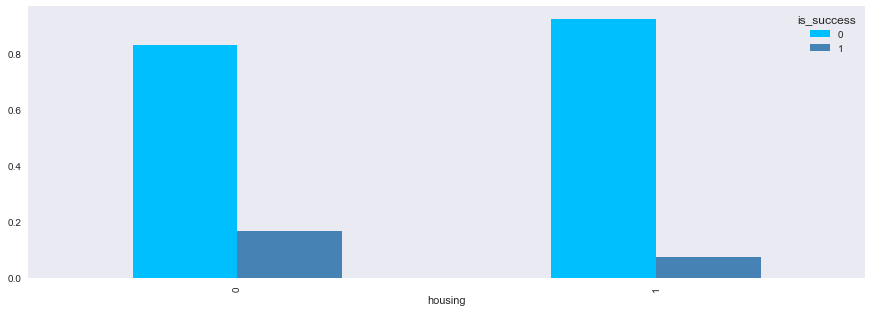

In [396]:
draw_data = pd.crosstab(data.housing, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

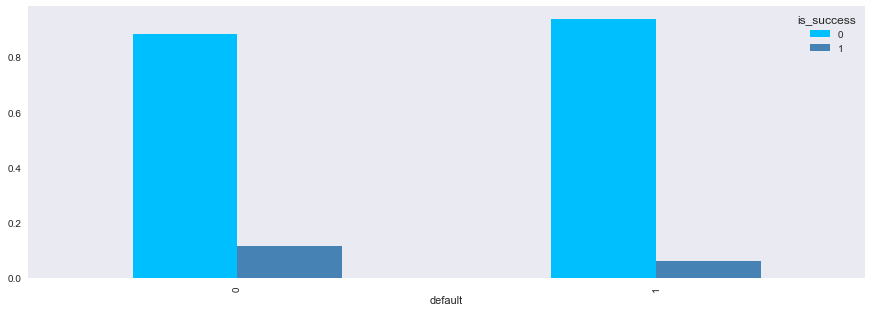

In [397]:
draw_data = pd.crosstab(data.default, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

In [398]:
data = data.drop(['education'],axis=1)
data = data.drop(['marital'],axis=1)
data = data.drop(['job'],axis=1)
data = data.drop(['contact'],axis=1)
data = data.drop(['poutcome'],axis=1)
data = data.drop(['month'],axis=1)
data['duration'] = data['duration']/60
print(data['duration'].mean())
print(data['duration'].mode())
print(data['duration'].max())

4.3027179963577895
0    2.066667
dtype: float64
81.9666666667


In [399]:
def age_(data):
    
    data.loc[(data['age'] <= 28) & (data['age'] >= 18),'age'] = 1
    data.loc[(data['age'] <= 39) & (data['age'] >= 29),'age'] = 2
    data.loc[(data['age'] <= 49) & (data['age'] >= 40),'age'] = 3
    data.loc[data['age'] >=40,'age'] = 4
    
    return data

data = age_(data)

In [400]:
def campaign_(data):
    
    data.loc[data['campaign'] == 1,'campaign'] = 1
    data.loc[(data['campaign'] >= 2) & (data['campaign'] <= 3),'campaign'] = 2
    data.loc[data['campaign'] >= 4,'campaign'] = 3
    
    return data

data = campaign_(data)
#print(data.campaign.value_counts())
def duration_(data):
    
    data.loc[data['duration'] < 1,'duration'] = 0
    data.loc[(data['duration'] >= 1) & (data['duration'] <= 3),'duration'] = 1
    data.loc[(data['duration'] > 3) & (data['duration'] <= 5),'duration'] = 2
    data.loc[(data['duration'] > 5) & (data['duration'] <= 8),'duration'] = 3
    data.loc[data['duration'] > 8,'duration'] = 4
    
    return data

data = duration_(data)

def pdays_(data):
    
    data.loc[~data['pdays'] > 0 ,'pdays'] = 1
    data.loc[(data['pdays'] >= 1) & (data['pdays'] <=10) ,'pdays'] = 2
    data.loc[(data['pdays'] >= 11) & (data['pdays'] <=50) ,'pdays'] = 3
    data.loc[(data['pdays'] >= 51) & (data['pdays'] <=100), 'pdays'] = 4
    data.loc[data['pdays'] >= 101] = 5
    
    return data

data = pdays_(data)

print(data.duration.value_counts())
print(data.pdays.value_counts())

1.0    15428
2.0     8607
5.0     6820
3.0     5440
4.0     4922
0.0     3994
Name: duration, dtype: int64
-1    36954
 5     6820
 4     1179
 3      132
 2      126
Name: pdays, dtype: int64


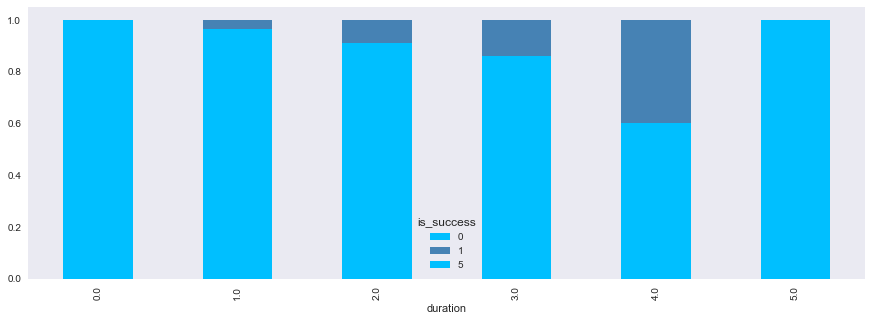

In [401]:
draw_data = pd.crosstab(data.duration, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

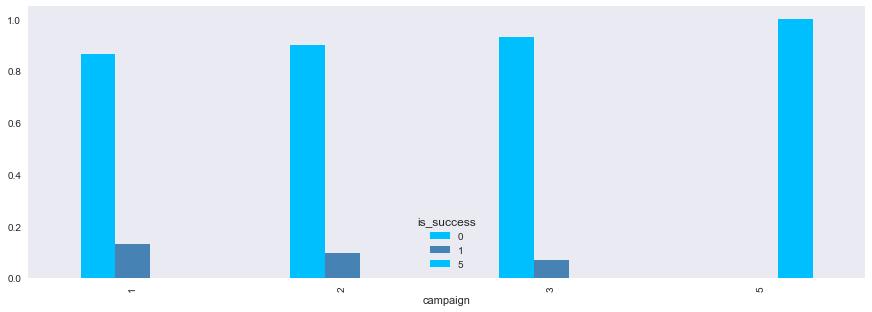

In [402]:
draw_data = pd.crosstab(data.campaign, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

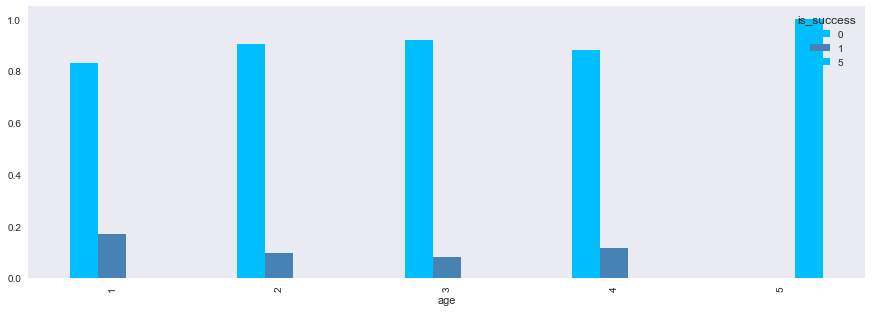

In [403]:
draw_data = pd.crosstab(data.age, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

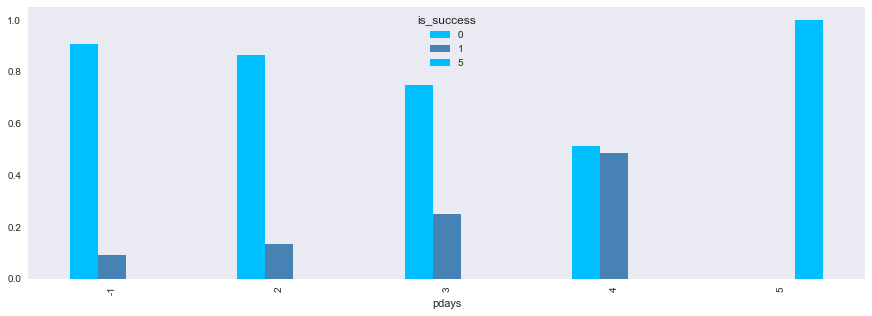

In [404]:
draw_data = pd.crosstab(data.pdays, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

In [405]:
classifiers = {'Gradient Boosting Classifier':GradientBoostingClassifier(),'Adaptive Boosting Classifier':AdaBoostClassifier(),'Linear Discriminant Analysis':LinearDiscriminantAnalysis(),'Logistic Regression':LogisticRegression(),'Random Forest Classifier': RandomForestClassifier(),'K Nearest Neighbour':KNeighborsClassifier(8)}#'Decision Tree Classifier':DecisionTreeClassifier(),'Gaussian Naive Bayes Classifier':GaussianNB(),'Support Vector Classifier':SVC(probability=True),}

In [406]:
data_y = pd.DataFrame(data['is_success'])
#print(data_y.columns)
data_X = data.drop('is_success',axis=1)
data_X = data_X.drop('day',axis=1)
log_cols = ["Classifier", "Accuracy"]
metrics_cols = ['Precision Score','Recall Score','F1-Score']
log = pd.DataFrame(columns=log_cols)
metric = pd.DataFrame(columns=metrics_cols)

In [407]:
rs = StratifiedShuffleSplit(n_splits=3, test_size=0.1, random_state=0)
rs.get_n_splits(data_X,data_y)

3

In [409]:
for Name,classify in classifiers.items():
    for train_index, test_index in rs.split(data_X,data_y):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X,X_test = data_X.iloc[train_index], data_X.iloc[test_index]
        y,y_test = data_y.iloc[train_index], data_y.iloc[test_index]
        cls = classify
        cls =cls.fit(X,y)
        y_out = cls.predict(X_test)
        accuracy = m.accuracy_score(y_test,y_out)
        precision = m.precision_score(y_test,y_out,average='macro')
        recall = m.recall_score(y_test,y_out,average='macro')
        f1_score = m.f1_score(y_test,y_out,average='macro')
        log_entry = pd.DataFrame([[Name,accuracy]], columns=log_cols)
        metric_entry = pd.DataFrame([[precision,recall,f1_score]], columns=metrics_cols)
        log = log.append(log_entry)
        metric = metric.append(metric_entry)

                     Classifier  Accuracy
0  Gradient Boosting Classifier  0.922601
0  Gradient Boosting Classifier  0.921495
0  Gradient Boosting Classifier  0.922601
0  Adaptive Boosting Classifier  0.250553
0  Adaptive Boosting Classifier  0.865546
0  Adaptive Boosting Classifier  0.272888
0  Linear Discriminant Analysis  0.914861
0  Linear Discriminant Analysis  0.913976
0  Linear Discriminant Analysis  0.915524
0           Logistic Regression  0.921937
0           Logistic Regression  0.914418
0           Logistic Regression  0.915966
0      Random Forest Classifier  0.911544
0      Random Forest Classifier  0.909774
0      Random Forest Classifier  0.908669
0           K Nearest Neighbour  0.912870
0           K Nearest Neighbour  0.912649
0           K Nearest Neighbour  0.912207


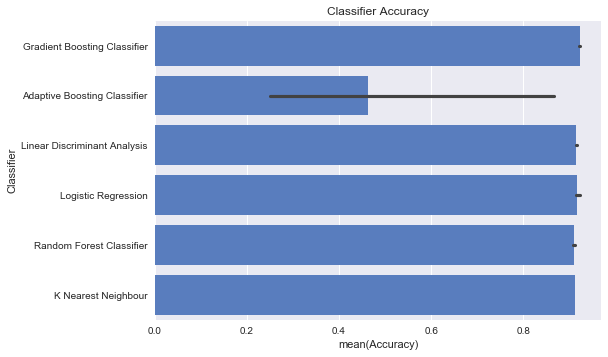

In [410]:
print(log)
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")  
plt.show()

                     Classifier  Accuracy
0  Gradient Boosting Classifier  0.922601
0  Gradient Boosting Classifier  0.921495
0  Gradient Boosting Classifier  0.922601
0  Adaptive Boosting Classifier  0.250553
0  Adaptive Boosting Classifier  0.865546
0  Adaptive Boosting Classifier  0.272888
0  Linear Discriminant Analysis  0.914861
0  Linear Discriminant Analysis  0.913976
0  Linear Discriminant Analysis  0.915524
0           Logistic Regression  0.921937
0           Logistic Regression  0.914418
0           Logistic Regression  0.915966
0      Random Forest Classifier  0.911544
0      Random Forest Classifier  0.909774
0      Random Forest Classifier  0.908669
0           K Nearest Neighbour  0.912870
0           K Nearest Neighbour  0.912649
0           K Nearest Neighbour  0.912207
0  Gradient Boosting Classifier  0.924812
0  Adaptive Boosting Classifier  0.244140
0  Linear Discriminant Analysis  0.917072
0           Logistic Regression  0.921716
0      Random Forest Classifier  0

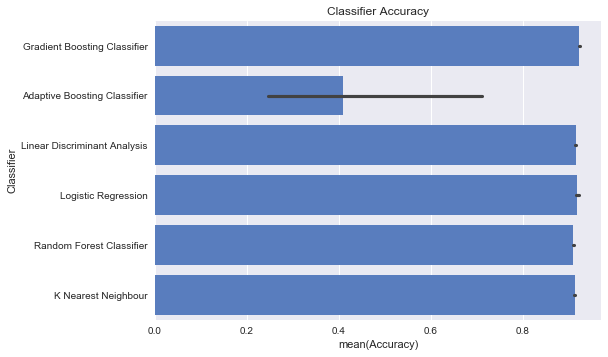

In [411]:
rs = ShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
rs.get_n_splits(data_X,data_y)
for Name,classify in classifiers.items():
    for train_index, test_index in rs.split(data_X,data_y):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X,X_test = data_X.iloc[train_index], data_X.iloc[test_index]
        y,y_test = data_y.iloc[train_index], data_y.iloc[test_index]
        cls = classify
        cls =cls.fit(X,y)
        y_out = cls.predict(X_test)
        accuracy = accuracy_score(y_test,y_out)
        precision = m.precision_score(y_test,y_out,average='macro')
        recall = m.recall_score(y_test,y_out,average='macro')
        f1_score = m.f1_score(y_test,y_out,average='macro')
        log_entry = pd.DataFrame([[Name,accuracy]], columns=log_cols)
        metric_entry = pd.DataFrame([[precision,recall,f1_score]], columns=metrics_cols)
        log = log.append(log_entry)
        metric = metric.append(metric_entry)
    
print(log)
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")  
plt.show()

In [412]:
print(metric)

   Precision Score  Recall Score  F1-Score
0         0.858273      0.750917  0.777476
0         0.853742      0.747495  0.773190
0         0.859988      0.748714  0.775281
0         0.689450      0.670044  0.406788
0         0.716806      0.716364  0.716583
0         0.692194      0.677631  0.426928
0         0.819132      0.764414  0.783401
0         0.816236      0.762558  0.781151
0         0.821188      0.769846  0.788351
0         0.860031      0.743283  0.769170
0         0.819584      0.731176  0.751115
0         0.827388      0.734057  0.755214
0         0.806957      0.743868  0.762562
0         0.799548      0.736484  0.754124
0         0.794682      0.732327  0.749197
0         0.842974      0.679829  0.675036
0         0.831145      0.681200  0.677752
0         0.829762      0.676601  0.668920
0         0.855226      0.750908  0.777376
0         0.618593      0.652662  0.406193
0         0.817331      0.775948  0.792033
0         0.840872      0.742656  0.766635
0         0

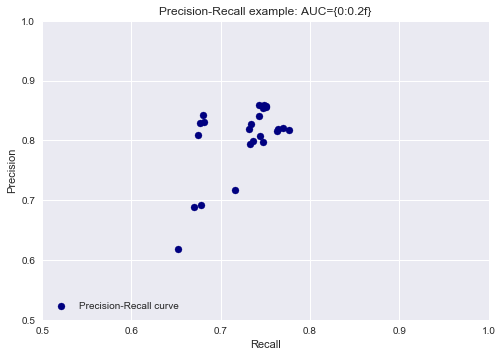

In [421]:
plt.scatter(metric['Recall Score'], metric['Precision Score'], color='navy',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.5, 1.0])
plt.xlim([0.5, 1.0])
plt.title('Precision-Recall example: AUC={0:0.2f}')
plt.legend(loc="lower left")
plt.show()